## Overview
This notebook provides visualizations and analysis from results. 

## Contents
- Results loading and preprocessing
- Data analysis
- Visualization of key features

Due to space limitations, we only include a subset of the experimental results used for visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import pandas as pd
import os
import sys
import re
import seaborn as sns
import matplotlib.dates as mdates

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 11

rel_path = "..//Database//online_result_0602//"
result_set = ["20241014-191212", "20241014-225600", "20241103-185013"]
total_order = 11825

## Online

In [2]:
df_online1 = pd.read_csv(rel_path + "%s//match_result_mpc.csv"%result_set[0], index_col=0)
df_online2 = pd.read_csv(rel_path + "%s//match_result_mpc.csv"%result_set[1], index_col=0)
df_online3 = pd.read_csv(rel_path + "%s//match_result_mpc.csv"%result_set[2], index_col=0)
df_online = pd.concat([df_online1, df_online2, df_online3], axis=0).reset_index(drop=True)

df_online_t = df_online[df_online["weight"] == "T"].reset_index(drop=True)
df_online_f = df_online[df_online["weight"] == "F"].reset_index(drop=True)
df_online_t["time_delta"] = (df_online_t["time"] - df_online_f["time"]) / df_online_f["time"]
df_online_t["match_result_delta"] = (df_online_t["match_result"] - df_online_f["match_result"]) / df_online_f[
    "match_result"
]

In [3]:
df_online["Algorithm"] = ["Greedy", "NetSciVDP"] * int(len(df_online) / 2)
df_online["RSR"] = df_online["match_result"] / total_order
df_online.columns = ["match_result", "time", "weight", "$t_o$", "$t_r$", "$t_l$", "RSR", "Algorithm"]
df_online

,match_result,time,weight,$t_o$,$t_r$,$t_l$,RSR,Algorithm
0,10182,12955.626323,T,60,30,40,Greedy,0.861057
1,10164,14649.963829,F,60,30,40,NetSciVDP,0.859535
2,10181,18361.719101,T,60,20,30,Greedy,0.860973
3,10169,20413.853283,F,60,20,30,NetSciVDP,0.859958
4,10121,10428.535405,T,30,10,20,Greedy,0.855899
5,9814,11031.977778,F,30,10,20,NetSciVDP,0.829937
6,10139,13407.559595,T,30,10,15,Greedy,0.857421
7,9964,14564.623651,F,30,10,15,NetSciVDP,0.842622
8,10143,25144.389118,T,30,5,10,Greedy,0.857759
9,10049,27202.350285,F,30,5,10,NetSciVDP,0.849810


## Figure 4

This figure shows computation time and Request Service Rate (RSR) of all experiments. 
Comparison of RSR, i.e., objective of Proble 1, and computation time for online algorithms with different parameter settings. Note that the color of the points indicates the parameter $t_o$, the size indicates the parameter $t_r$, and the marker indicates the type of algorithm used. The global optimal solution is computed by solving the same Problem with the offline algorithm.

Text(0, 0.5, 'RSR')

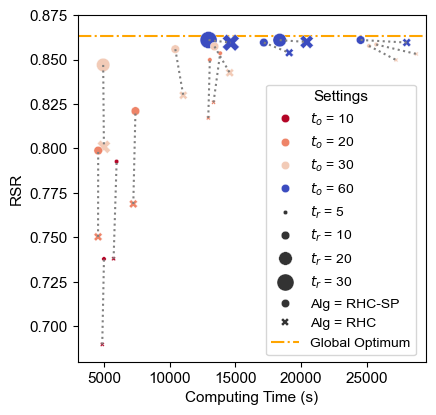

In [4]:
df_online["Algorithm"] = ["NetSicVDP", "Greedy"] * int(len(df_online) / 2)
df_online["RSR"] = df_online["match_result"] / total_order
df_online.columns = ["match_result", "time", "weight", "$t_o$", "$t_r$", "$t_l$", "RSR", "Algorithm"]


fig, ax = plt.subplots(figsize=(4.5, 4.5))
sns.scatterplot(
    data=df_online,
    x="time",
    y="RSR",
    hue="$t_o$",
    size="$t_r$",
    style="Algorithm",
    palette=plt.get_cmap("coolwarm").reversed(),
    sizes=(10, 150),
)
for i in range(int(len(df_online) / 2)):
    temp = df_online.iloc[2 * i : 2 * i + 2]
    sns.lineplot(data=temp, x="time", y="RSR", color="grey", linestyle="dotted")

best_rate = 10209/11825
ax.plot([3000, 29500], [best_rate, best_rate], color="orange", linestyle="-.", label="Global Optimum", zorder = 0)


handles, labels = ax.get_legend_handles_labels()
labels = [
    "$t_o$ = 10",
    "$t_o$ = 20",
    "$t_o$ = 30",
    "$t_o$ = 60",
    "$t_r$ = 5",
    "$t_r$ = 10",
    "$t_r$ = 20",
    "$t_r$ = 30",
    "Alg = RHC-SP",
    "Alg = RHC",
    "Global Optimum"
]
handles = handles[1:5] + handles[6:10] + handles[11:13] + handles[-1:]
ax.legend(handles=handles, labels=labels, fontsize = 10, bbox_to_anchor=(0.52, 0.82), loc="upper left", title="Settings")
plt.xlabel("Computing Time (s)")
plt.ylim(0.68, 0.875)
plt.xlim(3000, 29500)
plt.ylabel("RSR")

In [5]:
df0 = pd.read_csv("..//..//experiments//para_log.csv")
df1 = pd.read_csv("..//..//experiments//para_log_1.csv")
df2 = pd.read_csv("..//..//experiments//para_log_2.csv")
df = pd.concat([df0, df1, df2], axis=0).reset_index(drop=True)
newdf = df.loc[df.index.repeat((120 / df.roll).round().astype(int))]

time_list = []
for i in (120 / df.roll).round().astype(int):
    temp = pd.date_range(
        start=pd.to_datetime("2022-06-01 08:00:00 AM"),
        end=pd.to_datetime("2022-06-01 10:00:00 AM"),
        freq=str(120 / i) + "min",
    ).tolist()[1:]
    time_list.extend(temp)

newdf["time"] = time_list
newdf.set_index(["opt", "roll", "locked", "weight"], inplace=True)

In [6]:
dic = {}

for path in result_set:
    folder = rel_path + path + "/result_analysis"
    print(folder)
    os.makedirs(folder, exist_ok=True)
    files = os.listdir(rel_path + path)
    for file in files:
        if file.endswith(".txt") & (("log" in file) == False):
            n_int = re.search(r"\d{2}_\d*_\d*", file)
            weight = re.search(r"\w.txt", file).group(0)[0]
            temp = str([int(s) for s in n_int.group(0).split("_") if s.isdigit()] + [str(weight)])
            val = []
            filename_a = rel_path + path + "/" + file
            with open(filename_a, "r") as f:
                for line in f:
                    m = re.search(r"Total matched order so far (\d*)", line)
                    if m:
                        val.append(m.group(1))

            dic[temp] = np.array(val).astype(int)

..//Database//online_result_0602//20241014-191212/result_analysis
..//Database//online_result_0602//20241014-225600/result_analysis
..//Database//online_result_0602//20241103-185013/result_analysis


In [7]:
newdf = newdf.sort_index()

for key in dic.keys():
    try:
        key1 = eval(key)
        newdf.loc[tuple(key1), "matched"] = dic[key]
    except:
        pass

newdf.reset_index(inplace=True)
newdf["time"] = pd.to_datetime(newdf["time"], format="%H:%M:%S")
newdf["Alg"] = newdf["weight"].map({"T": "NetSciVDP", "F": "Greedy"})
newdf

,opt,roll,locked,weight,time,matched,Alg
0,10,5,8,F,2022-06-01 08:05:00,715.0,Greedy
1,10,5,8,F,2022-06-01 08:10:00,1190.0,Greedy
2,10,5,8,F,2022-06-01 08:15:00,1616.0,Greedy
3,10,5,8,F,2022-06-01 08:20:00,1919.0,Greedy
4,10,5,8,F,2022-06-01 08:25:00,2263.0,Greedy
...,...,...,...,...,...,...,...
507,60,30,40,F,2022-06-01 10:00:00,10164.0,Greedy
508,60,30,40,T,2022-06-01 08:30:00,3251.0,NetSciVDP
509,60,30,40,T,2022-06-01 09:00:00,5767.0,NetSciVDP
510,60,30,40,T,2022-06-01 09:30:00,8308.0,NetSciVDP


In [8]:
# computing the matched ratio of two algorithms
newdf_t = newdf[newdf["weight"] == "T"].sort_values(by=["opt", "roll", "locked", "time"]).reset_index(drop=True)
newdf_f = newdf[newdf["weight"] == "F"].sort_values(by=["opt", "roll", "locked", "time"]).reset_index(drop=True)
newdf_t["matched_ratio"] = newdf_t["matched"] / newdf_f["matched"]
newdf_t = newdf_t[["opt", "roll", "locked", "Alg", "time", "matched_ratio"]]

In [9]:
# we create a dummy dataframe to help label the lines in each subplot using the same color map and style list
dummy_temp_for_labeling = newdf_t.iloc[0:6, :].copy()
dummy_temp_for_labeling["matched_ratio"] = np.nan
dummy_temp_for_labeling["roll"] = [5, 10, 20, 30, 5, 10]
dummy_temp_for_labeling["locked"] = [8, 10, 15, 20, 30, 40]

# remove (tr = 5, tl = 8, to = 10 or 30)
# this creates cleaner plots by showing only the essential results. 
newdf_t1 = newdf_t[~((newdf_t["roll"] == 5) & (newdf_t["locked"] == 8) & (newdf_t["opt"] != 10))]
newdf_t1.reset_index(drop=True, inplace=True)
newdf_t1

,opt,roll,locked,Alg,time,matched_ratio
0,10,5,8,NetSciVDP,2022-06-01 08:05:00,1.000000
1,10,5,8,NetSciVDP,2022-06-01 08:10:00,1.000000
2,10,5,8,NetSciVDP,2022-06-01 08:15:00,0.993812
3,10,5,8,NetSciVDP,2022-06-01 08:20:00,0.996352
4,10,5,8,NetSciVDP,2022-06-01 08:25:00,0.997791
...,...,...,...,...,...,...
179,60,20,30,NetSciVDP,2022-06-01 10:00:00,1.001180
180,60,30,40,NetSciVDP,2022-06-01 08:30:00,1.000308
181,60,30,40,NetSciVDP,2022-06-01 09:00:00,1.004879
182,60,30,40,NetSciVDP,2022-06-01 09:30:00,1.005689


## Figure 5

C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\3630324248.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\3630324248.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\3630324248.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\3630324248.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklab

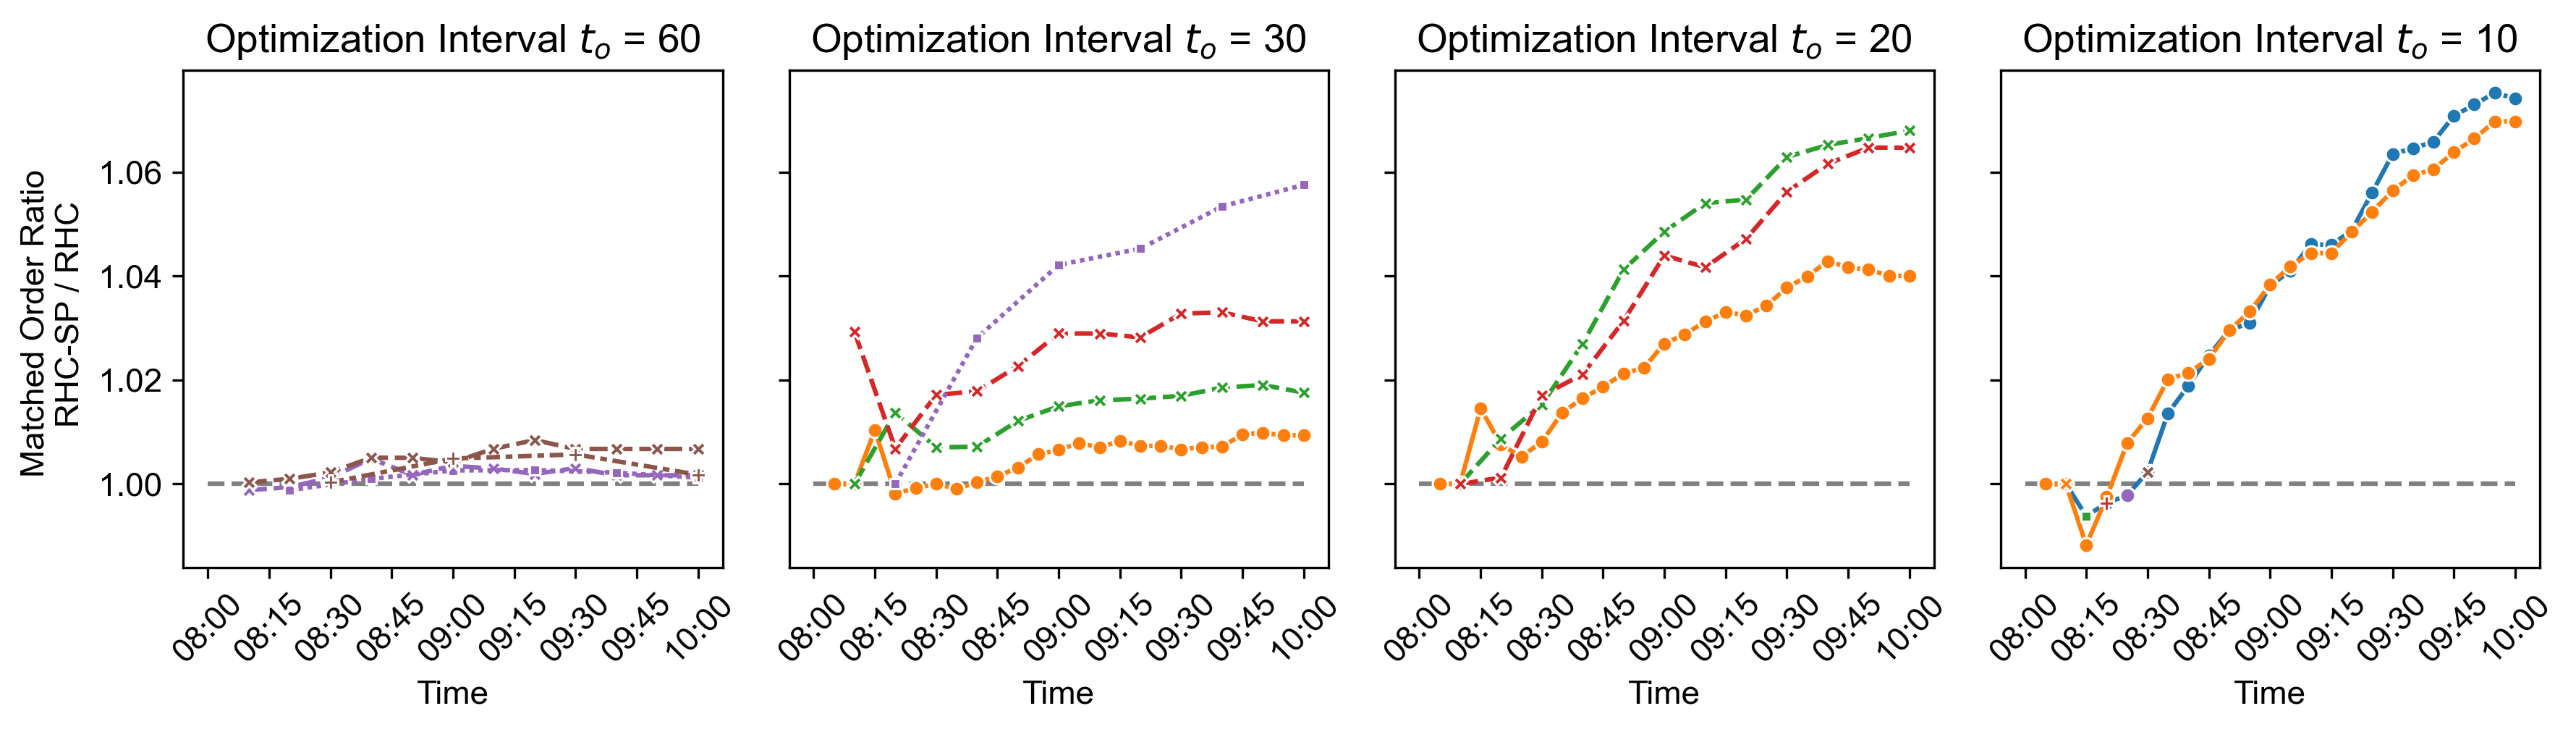

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey=True, tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for ind in range(4):
    i = 3 - ind
    opt_int = opt_list[i]
    temp = newdf_t1[newdf_t1.opt == opt_int]
    temp = pd.concat([dummy_temp_for_labeling, temp], axis=0)
    temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
    sns.lineplot(
        x=[pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM")],
        y=[1, 1],
        color="grey",
        linestyle="--",
        ax=ax[i],
    )

    sns.lineplot(
        data=temp,
        x="time",
        y="matched_ratio",
        style="$t_r$",
        hue="$t_l$",
        ax=ax[i],
        palette="tab10",
        markers=True,
        markersize=5,
        legend="full",
        # alpha=0.8,
        linewidth=1.5,
        # errorbar = None
    )

    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order Ratio \n RHC-SP / RHC")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM"))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    # turn off legend
    ax[i].get_legend().remove()

plt.savefig("online_matched_order_ratio_fig5.png", dpi=300)

C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\3150158293.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


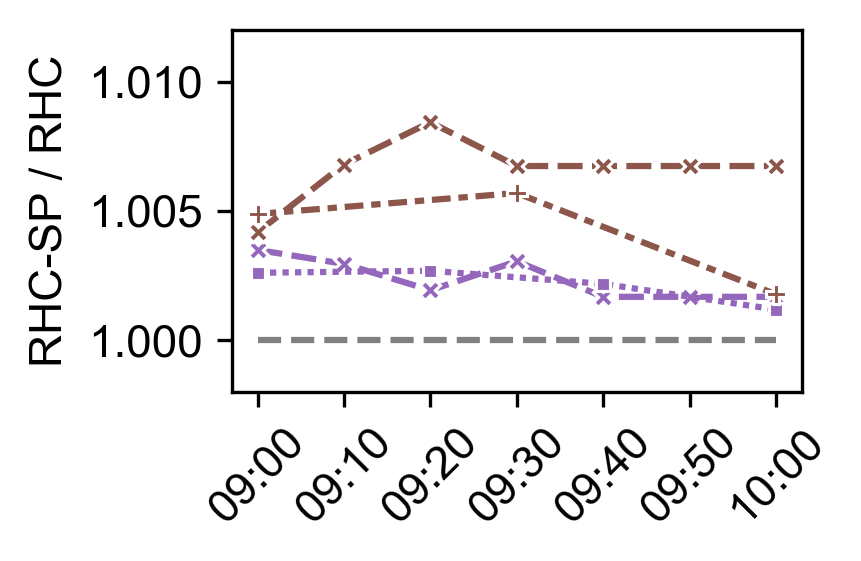

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2), facecolor="w", edgecolor="k", tight_layout=True, dpi=300)

opt_int = opt_list[0]
temp = newdf_t1[newdf_t1.opt == opt_int]
temp = pd.concat([dummy_temp_for_labeling, temp], axis=0)
temp_after9 = temp[temp["time"] >= pd.to_datetime("2022-06-01 09:00:00 AM")]
temp_after9 = pd.concat([dummy_temp_for_labeling, temp_after9], axis=0)
temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
temp_after9.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
sns.lineplot(
    x=[pd.to_datetime("2022-06-01 09:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM")],
    y=[1, 1],
    color="grey",
    linestyle="--",
    ax=ax,
)

sns.lineplot(
    data=temp_after9,
    x="time",
    y="matched_ratio",
    style="$t_r$",
    hue="$t_l$",
    ax=ax,
    palette="tab10",
    markers=True,
    markersize=5,
    legend="full",
    linewidth=1.5,
    # errorbar = None
)

ax.set_xlabel("")
ax.set_ylabel("RHC-SP / RHC")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xlim = (pd.to_datetime("2022-06-01 09:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.get_legend().remove() 
ax.set_ylim(0.998, 1.012)

plt.savefig("online_matched_order_ratio_fig5_only_after9.png", dpi=300)

Reverse order with subplot 4 having different y-scale for better visibility. 

C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\570436980.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\570436980.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\570436980.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\RTW\AppData\Local\Temp\ipykernel_8040\570436980.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(

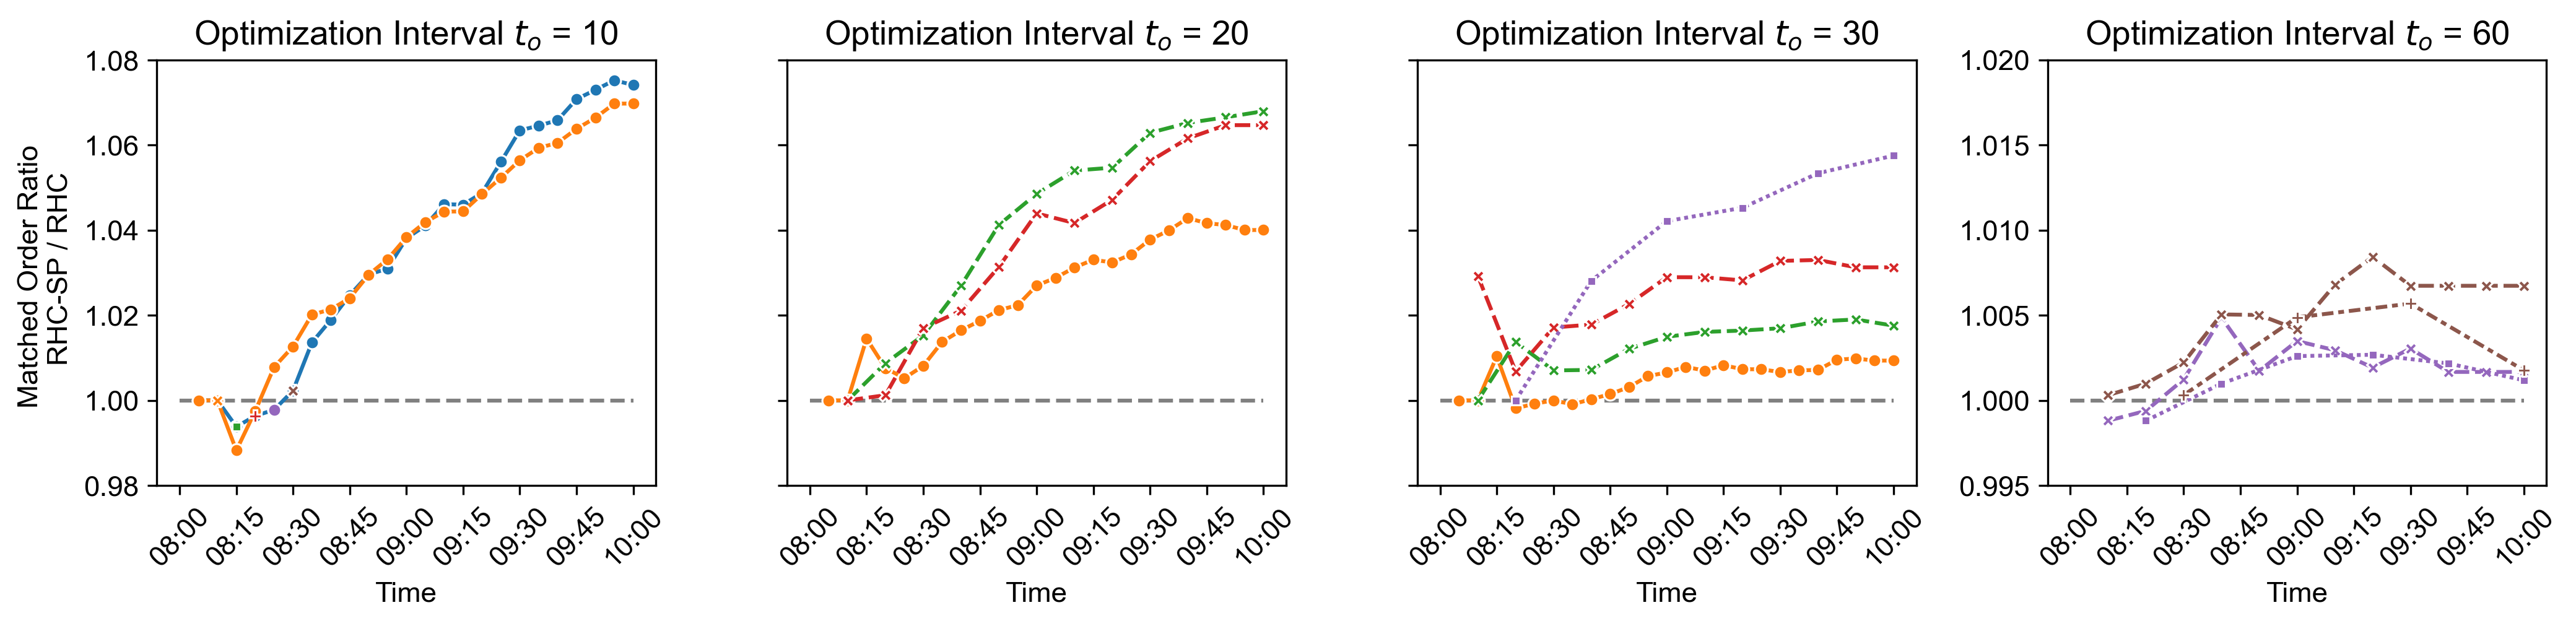

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(14, 3.5), facecolor="w", edgecolor="k", tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for ind in range(4):
    i = 4 - 1 - ind
    opt_int = opt_list[ind]
    temp = newdf_t1[newdf_t1.opt == opt_int]
    temp = pd.concat([dummy_temp_for_labeling, temp], axis=0)
    temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
    sns.lineplot(
        x=[pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM")],
        y=[1, 1],
        color="grey",
        linestyle="--",
        ax=ax[i],
    )

    sns.lineplot(
        data=temp,
        x="time",
        y="matched_ratio",
        style="$t_r$",
        hue="$t_l$",
        ax=ax[i],
        palette="tab10",
        markers=True,
        markersize=5,
        legend="full",
        # alpha=0.8,
        linewidth=1.5,
        # errorbar = None
    )

    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order Ratio \n RHC-SP / RHC")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM"))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    # turn off legend
    ax[i].get_legend().remove()

ax[0].set_ylim(0.98, 1.08)
ax[1].set_ylim(0.98, 1.08)
ax[2].set_ylim(0.98, 1.08)
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[3].set_ylabel("")
ax[3].set_ylim(0.995, 1.02)
plt.subplots_adjust(hspace=0)


The following code is simply to generate a clean legend with all colors and styles we used. 

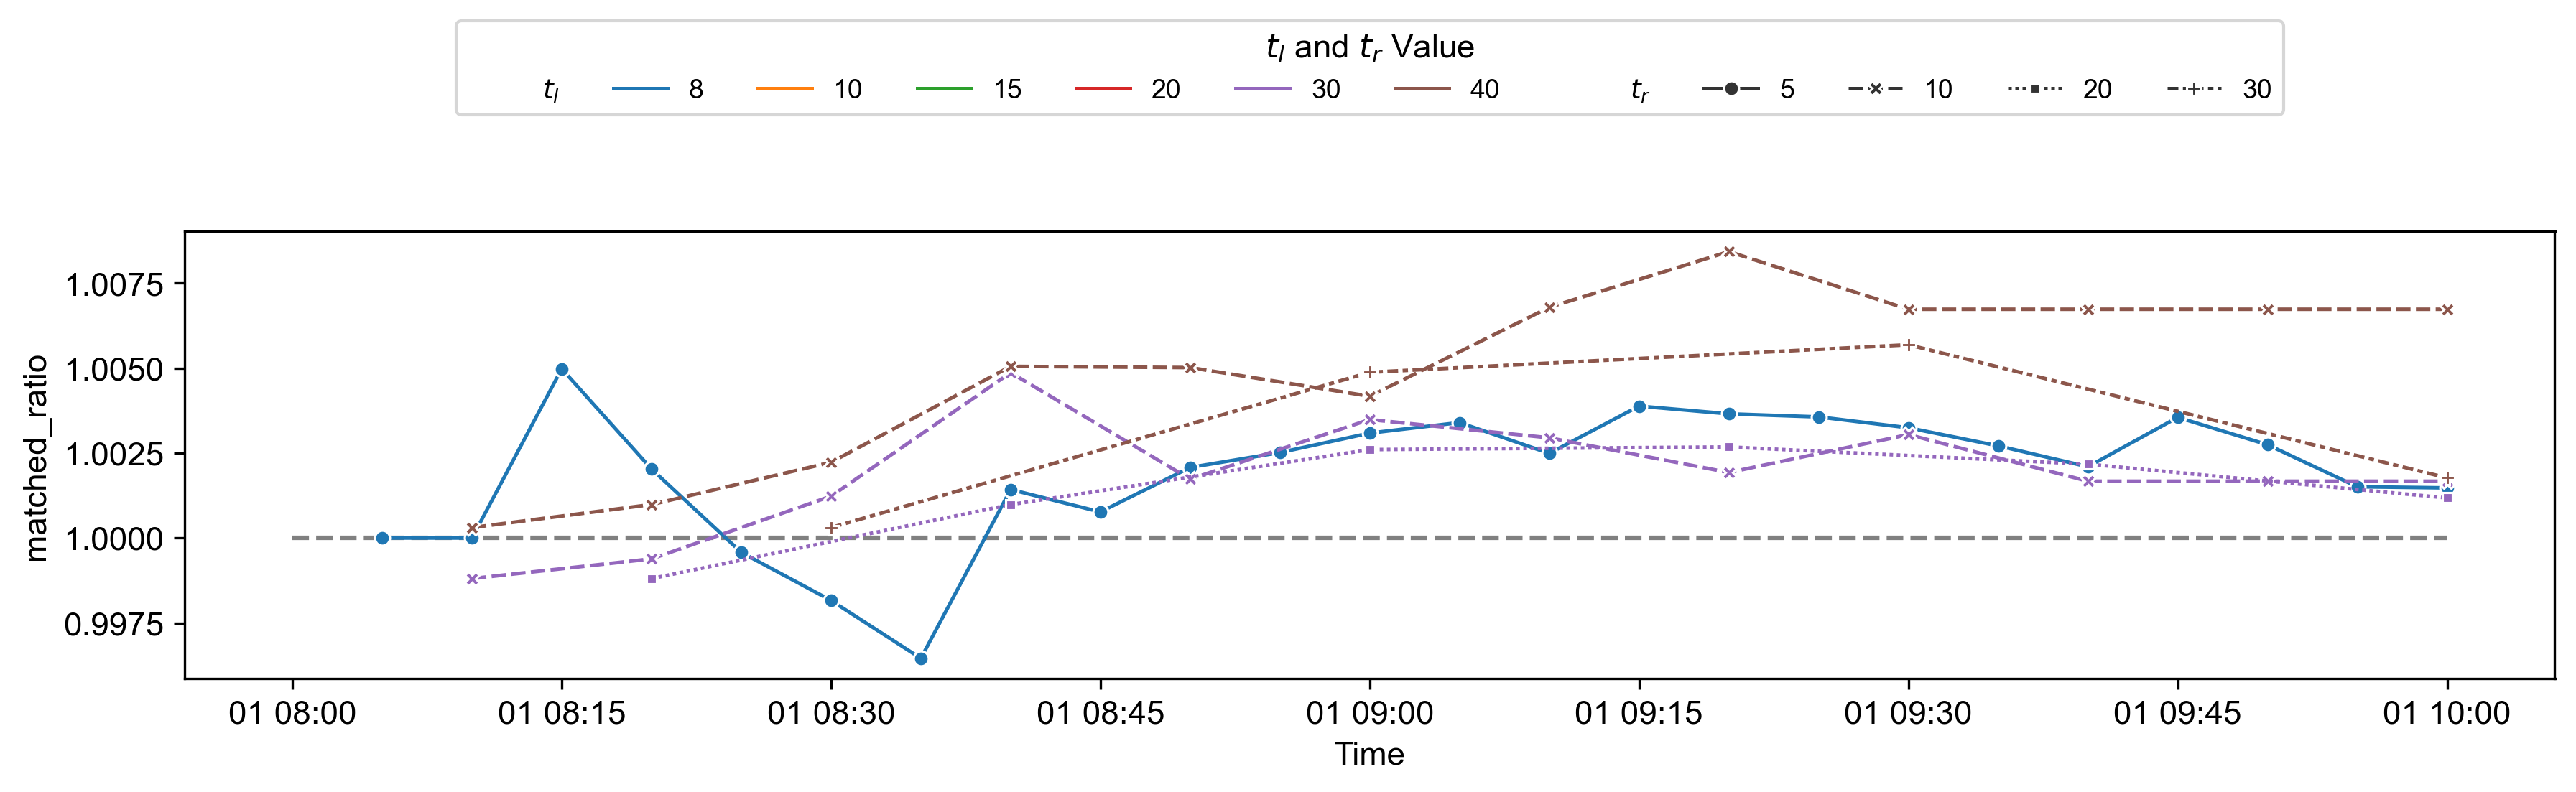

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey=True, tight_layout=True, dpi=300)
opt_list = [60, 30, 20, 10]

for i in range(1):
    opt_int = opt_list[i]
    temp = newdf_t[newdf_t.opt == opt_int]
    temp = pd.concat([dummy_temp_for_labeling, temp], axis=0)
    temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
    sns.lineplot(
        x=[pd.to_datetime("2022-06-01 08:00:00 AM"), pd.to_datetime("2022-06-01 10:00:00 AM")],
        y=[1, 1],
        color="grey",
        linestyle="--",
        ax=ax,
    )

    sns.lineplot(
        data=temp,
        x="time",
        y="matched_ratio",
        style="$t_r$",
        hue="$t_l$",
        ax=ax,
        palette="tab10",
        markers=True,
        markersize = 5,
        legend="full",
        # alpha=0.8,
        linewidth=1.2,
        # errorbar = None
    )

    ax.set_xlabel("Time")
    ax.get_legend().remove()
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.5), ncol=12, fontsize=9, title="$t_l$ and $t_r$ Value")